In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [3]:
# Load dataset
file_path = "nba.csv"
dataset = pd.read_csv(file_path)


In [4]:
# Display missing values
print("Missing Values:")
print(dataset.isnull().sum())

Missing Values:
Name     0
GP       0
MIN      0
PPT      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%     11
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
STL      0
BLK      0
TOV      0
TAR      0
dtype: int64


In [5]:
# Remove 'Name' column
if 'Name' in dataset.columns:
    dataset.drop(columns=['Name'], inplace=True)

In [6]:
# Convert target variable to integer
dataset['TAR'] = dataset['TAR'].astype(int)


In [7]:
# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
dataset.iloc[:, :-1] = imputer.fit_transform(dataset.iloc[:, :-1])


In [8]:
# Define features and target
X = dataset.drop(columns=['TAR'])
y = dataset['TAR']

In [9]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Avg F1 Score (CV):", knn_cv_scores.mean())
print("KNN F1 Score (Test):", f1_score(y_test, y_pred_knn))

KNN Avg F1 Score (CV): 0.714671636036298
KNN F1 Score (Test): 0.7597765363128491


In [12]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Avg F1 Score (CV):", rf_cv_scores.mean())
print("Random Forest F1 Score (Test):", f1_score(y_test, y_pred_rf))


Random Forest Avg F1 Score (CV): 0.7456895318616505
Random Forest F1 Score (Test): 0.776536312849162


In [13]:
# Logistic Regression with Regularization
regularization_options = [None, 'l1', 'l2', 'elasticnet']
best_f1 = 0
best_penalty = None

for reg in regularization_options:
    solver = 'saga' if reg == 'elasticnet' else 'liblinear' if reg in ['l1', 'l2'] else 'lbfgs'
    l1_ratio = 0.5 if reg == 'elasticnet' else None

    log_reg = LogisticRegression(penalty=reg, solver=solver, l1_ratio=l1_ratio, max_iter=500)
    log_reg.fit(X_train, y_train)
    y_pred_log = log_reg.predict(X_test)
    f1 = f1_score(y_test, y_pred_log)
    print(f"Logistic Regression ({reg}) F1 Score:", f1)

    if f1 > best_f1:
        best_f1 = f1
        best_penalty = reg

print(f"Optimal Logistic Regression Penalty: {best_penalty}, F1 Score: {best_f1}")

Logistic Regression (None) F1 Score: 0.8011049723756906
Logistic Regression (l1) F1 Score: 0.8011049723756906
Logistic Regression (l2) F1 Score: 0.8055555555555556
Logistic Regression (elasticnet) F1 Score: 0.8011049723756906
Optimal Logistic Regression Penalty: l2, F1 Score: 0.8055555555555556


In [14]:
# ANN Model
ann = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=2000, solver='adam', learning_rate_init=0.001, early_stopping=True, random_state=42)
ann_cv_scores = cross_val_score(ann, X_train, y_train, cv=10, scoring='f1')
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
print("ANN Avg F1 Score (CV):", ann_cv_scores.mean())
print("ANN F1 Score (Test):", f1_score(y_test, y_pred_ann))

ANN Avg F1 Score (CV): 0.7636576433194386
ANN F1 Score (Test): 0.7811634349030471


In [15]:
# Random Forest Hyperparameter Tuning
rf_grid = {'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Optimal RF Parameters:", grid_search.best_params_)
print("Optimal RF F1 Score (CV):", grid_search.best_score_)

Optimal RF Parameters: {'n_estimators': 200}
Optimal RF F1 Score (CV): 0.7413334277876062


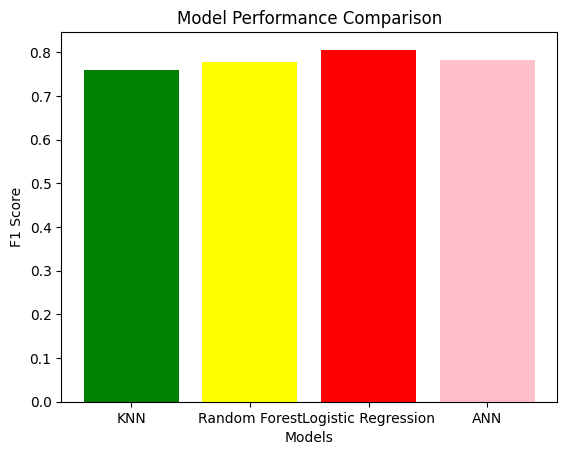

In [16]:
# Model Performance Visualization
models = ['KNN', 'Random Forest', 'Logistic Regression', 'ANN']
f1_scores = [
    f1_score(y_test, y_pred_knn),
    f1_score(y_test, y_pred_rf),
    best_f1,
    f1_score(y_test, y_pred_ann)
]
plt.bar(models, f1_scores, color=['green', 'yellow', 'red', 'pink'])
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Model Performance Comparison")
plt.show()
